In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 20
pd.set_option('max_columns', None)

In [2]:
ca_plotting = pd.read_csv('Data_Marketing_Customer_Analysis_Round2.csv')

In [3]:
def drop_columns(ca_plotting) :
    ca_plotting.drop(columns=["Unnamed: 0", "Customer","Vehicle Type"], inplace=True)
    return ca_plotting

drop_columns(ca_plotting)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [4]:
#Change format of effective to date
pd.to_datetime(ca_plotting["Effective To Date"],format="%m/%d/%y")
ca_plotting['month']= pd.DatetimeIndex(ca_plotting['Effective To Date']).month
print(ca_plotting['month'])
ca_plotting.month.value_counts()

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: month, Length: 10910, dtype: int64


1    5818
2    5092
Name: month, dtype: int64

In [5]:
#Drop the old column
def drop_effective(ca_plotting) :
    ca_plotting.drop(columns=["Effective To Date"], inplace=True)
    return ca_plotting


drop_effective(ca_plotting)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [6]:
#Change the type of month
ca_plotting['month']= ca_plotting['month'].astype('object')

## Getting rid of the outliers

In [7]:
##Monthly premium auto
#IQR
Q1_MPA = np.percentile(ca_plotting['Monthly Premium Auto'], 25)
Q3_MPA = np.percentile(ca_plotting['Monthly Premium Auto'], 75)
IQR_MPA = Q3_MPA - Q1_MPA

In [8]:
#drop every row with a value outside the IQR from Monthly Premium Auto

In [9]:
data_clean = ca_plotting[(ca_plotting['Monthly Premium Auto']< (Q3_MPA+1.5*IQR_MPA))]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly Premium Auto'>

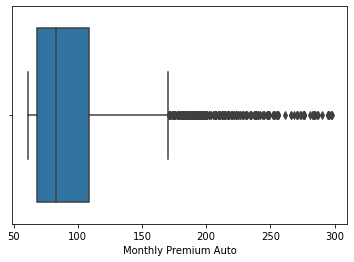

In [10]:
sns.boxplot(ca_plotting['Monthly Premium Auto'])

In [11]:
data_clean = data_clean.reset_index(drop=True)

In [12]:
data_clean

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10388,California,3579.023825,No,Extended,High School or Below,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,1
10389,Arizona,2771.663013,No,Basic,College,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10390,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10391,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly Premium Auto'>

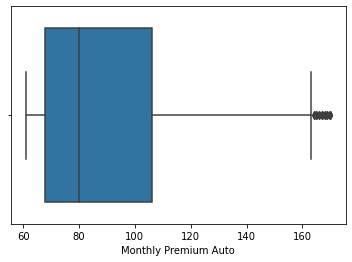

In [13]:
sns.boxplot(data_clean['Monthly Premium Auto'])

In [14]:
##income

<AxesSubplot:xlabel='Income', ylabel='Count'>

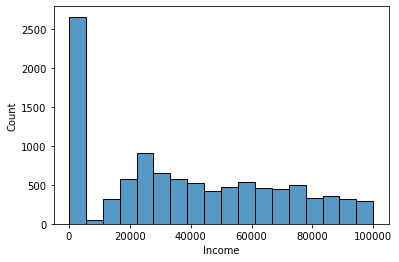

In [15]:
sns.histplot(data_clean['Income'])

In [16]:
## Cleaning column income. Replace 0 with NaN
data_clean['Income']=data_clean['Income'].replace(0,np.nan)

<AxesSubplot:xlabel='Income', ylabel='Count'>

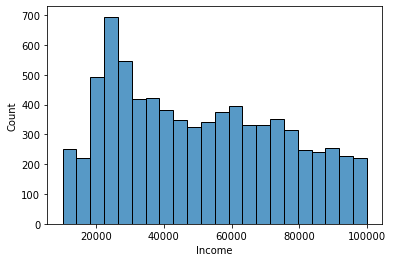

In [17]:
sns.histplot(data_clean['Income'])

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Lifetime Value'>

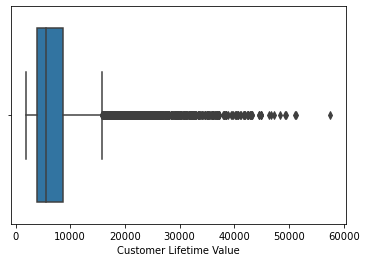

In [18]:
sns.boxplot(data_clean['Customer Lifetime Value'])

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Count'>

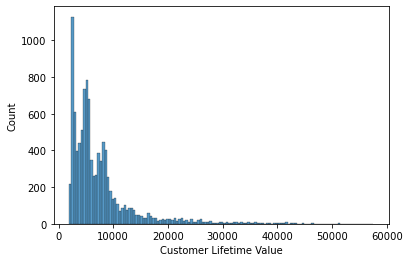

In [19]:
### Cleaning customer lifetime value

sns.histplot(data_clean['Customer Lifetime Value'])

In [20]:
#IQR
Q1_customer_lv = np.percentile(ca_plotting['Customer Lifetime Value'], 25)
Q1_customer_lv

4014.453113

In [21]:
Q3_customer_lv = np.percentile(ca_plotting['Customer Lifetime Value'], 75)
Q3_customer_lv

8992.779137

In [22]:
IQR_customer_lv = Q3_customer_lv - Q1_customer_lv
IQR_customer_lv

4978.326024

In [23]:
data_clean = data_clean[(data_clean['Customer Lifetime Value']< (Q3_customer_lv +1.5*IQR_customer_lv))]

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Lifetime Value'>

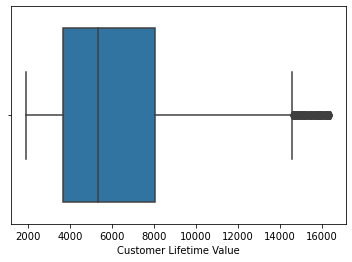

In [24]:
sns.boxplot(data_clean['Customer Lifetime Value'])

In [25]:
data_clean= data_clean.reset_index(drop=True)

In [26]:
display(data_clean.isnull().sum())

State                      551
Customer Lifetime Value      0
Response                   551
Coverage                     0
Education                    0
                          ... 
Sales Channel                0
Total Claim Amount           0
Vehicle Class              540
Vehicle Size               540
month                        0
Length: 23, dtype: int64

### Droping NaN in the entire data

In [27]:
data_clean = data_clean.dropna(axis=0, how='any')

#reset the index!
data_clean= data_clean.reset_index(drop=True)
data_clean

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029.0,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139.0,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
2,California,5035.035257,No,Basic,Doctor,Employed,F,37405.0,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
3,California,4956.247235,No,Basic,High School or Below,Employed,M,87197.0,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,2
4,California,5989.773931,Yes,Premium,College,Employed,M,66839.0,Suburban,Single,154,33.0,24,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,Washington,4547.892543,No,Premium,Bachelor,Employed,M,33531.0,Suburban,Married,116,11.0,15,0.0,1,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,1
5986,California,3579.023825,No,Extended,High School or Below,Employed,F,28304.0,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,1
5987,Arizona,2771.663013,No,Basic,College,Employed,M,59855.0,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
5988,Oregon,5259.444853,No,Basic,College,Employed,F,61146.0,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1


### Split data into categorical features and numerical ones

In [28]:
ca_categoricals = data_clean.select_dtypes(include=['object'])
ca_floats = data_clean.select_dtypes(include=['float64'])
ca_integers = data_clean.select_dtypes(include=['int64'])
ca_numerical = pd.concat([ca_integers,ca_floats], axis=1)


In [29]:
ca_categoricals


,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,month
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,2
1,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,2
2,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,2
3,California,No,Basic,High School or Below,Employed,M,Urban,Single,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,2
4,California,Yes,Premium,College,Employed,M,Suburban,Single,Personal Auto,Personal L1,Offer2,Branch,Sports Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,Washington,No,Premium,Bachelor,Employed,M,Suburban,Married,Personal Auto,Personal L3,Offer4,Agent,Two-Door Car,Medsize,1
5986,California,No,Extended,High School or Below,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,1
5987,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,1
5988,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,1


In [30]:
ca_numerical

,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Income,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,61,52,9,4809.216960,48029.0,7.0,0.0,292.800000
1,100,31,2,14947.917300,22139.0,34.0,0.0,480.000000
2,63,99,4,5035.035257,37405.0,8.0,3.0,287.556107
3,63,45,3,4956.247235,87197.0,35.0,0.0,247.402353
4,154,24,1,5989.773931,66839.0,33.0,0.0,739.200000
...,...,...,...,...,...,...,...,...
5985,116,15,1,4547.892543,33531.0,11.0,0.0,801.577478
5986,91,30,1,3579.023825,28304.0,10.0,2.0,655.200000
5987,74,82,1,2771.663013,59855.0,30.0,4.0,355.200000
5988,65,68,6,5259.444853,61146.0,7.0,0.0,273.018929


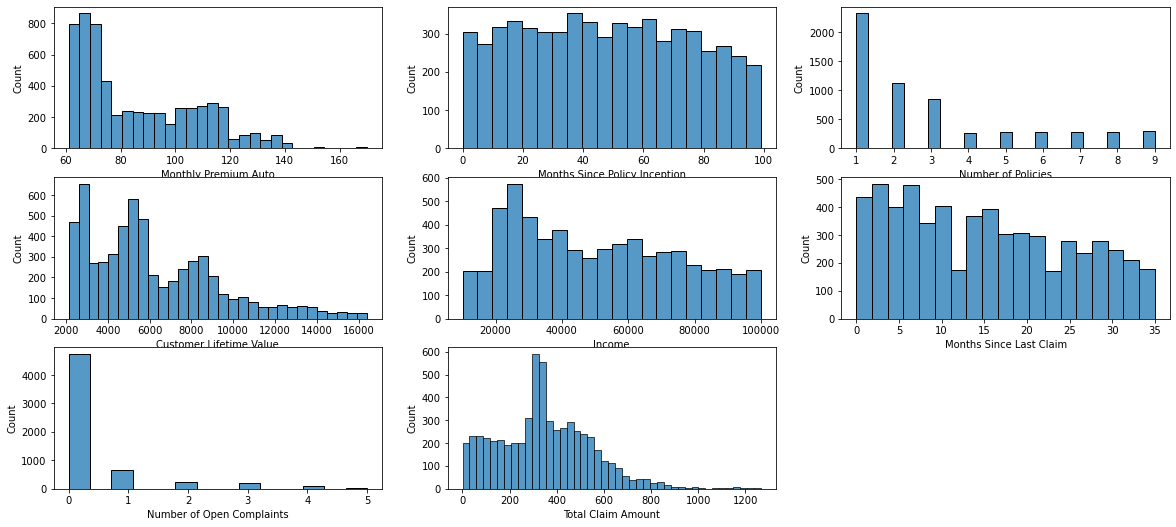

In [31]:
plt.figure(figsize=(20,12))
for i, column in enumerate(ca_numerical.columns,1):
    plt.subplot(4,3,i)
    sns.histplot(ca_numerical[column])

In [32]:
# Creating dummies for the categorical features
categorical_cols=pd.get_dummies(ca_categoricals[:], drop_first=True)
categorical_cols

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_2
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1
4,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
5986,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5987,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
5988,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [33]:
### Activity 7

### Split X and y

In [34]:
X = ca_numerical.iloc[:,:-1]

# appending the categorical features to split and test all the features together
X = pd.concat([X,categorical_cols], axis=1)



In [35]:
X

,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Income,Months Since Last Claim,Number of Open Complaints,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_2
0,61,52,9,4809.216960,48029.0,7.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,100,31,2,14947.917300,22139.0,34.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,63,99,4,5035.035257,37405.0,8.0,3.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,63,45,3,4956.247235,87197.0,35.0,0.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1
4,154,24,1,5989.773931,66839.0,33.0,0.0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,116,15,1,4547.892543,33531.0,11.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
5986,91,30,1,3579.023825,28304.0,10.0,2.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5987,74,82,1,2771.663013,59855.0,30.0,4.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
5988,65,68,6,5259.444853,61146.0,7.0,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [36]:
Y = ca_numerical.iloc[:,-1]
Y

0       292.800000
1       480.000000
2       287.556107
3       247.402353
4       739.200000
           ...    
5985    801.577478
5986    655.200000
5987    355.200000
5988    273.018929
5989    618.288849
Name: Total Claim Amount, Length: 5990, dtype: float64

In [37]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30,random_state=100)

### Scale the data

In [38]:
std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)

X_test_scaled = std_scaler.transform(X_test)

In [39]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 1.54637327 -1.00260126 -0.81641828 ... -1.56105261 -0.48256884
  -0.92705097]
 [-0.92734984  1.46406078  0.80251851 ...  0.6405934  -0.48256884
  -0.92705097]
 [-0.47758201  0.42734775  0.39778431 ...  0.6405934  -0.48256884
   1.07868934]
 ...
 [ 0.46693046  0.10560922 -0.41168408 ...  0.6405934  -0.48256884
   1.07868934]
 [ 0.60186081 -1.03834999 -0.00694988 ... -1.56105261  2.07224321
  -0.92705097]
 [-1.01730341  0.46309647  1.20725271 ... -1.56105261 -0.48256884
  -0.92705097]]
--------
[[-1.10725698 -1.32433979  2.01672111 ...  0.6405934  -0.48256884
   1.07868934]
 [-1.0622802  -0.10888313 -0.81641828 ...  0.6405934  -0.48256884
   1.07868934]
 [-1.01730341 -1.43158596  2.01672111 ... -1.56105261  2.07224321
   1.07868934]
 ...
 [-0.02781417 -1.43158596  1.20725271 ...  0.6405934  -0.48256884
  -0.92705097]
 [-1.0622802  -0.25187803 -0.00694988 ...  0.6405934  -0.48256884
   1.07868934]
 [ 1.14158221 -0.96685254  2.42145531 ...  0.6405934  -0.48256884
  -0.92705097]]


### Normalization
#### Apply on X_train and X_test and print separately to visually compare 

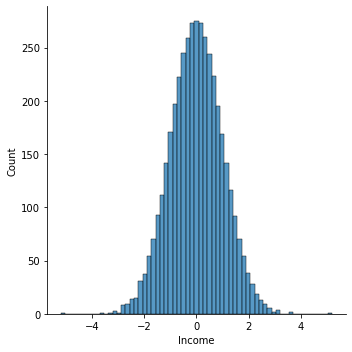

In [40]:
## of Income X_train applying Quantile Transformer
qt = QuantileTransformer(output_distribution='normal')
qt.fit(X_train['Income'].to_numpy().reshape(-1,1))
X_train['Income']= qt.transform(X_train['Income'].to_numpy().reshape(-1,1))
sns.displot(X_train['Income'])


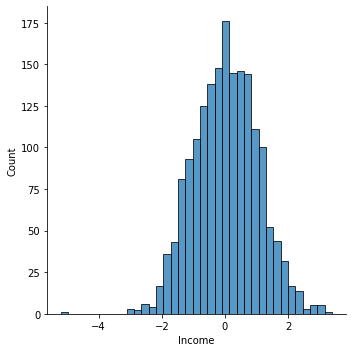

In [41]:
## of Income test applying Quantile Transformer
X_test['Income'] = qt.transform(X_test['Income'].to_numpy().reshape(-1,1))
sns.displot(X_test['Income'])


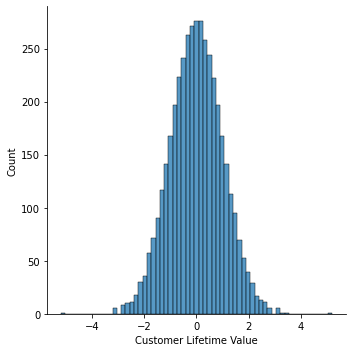

In [42]:
##of Customer Lifetime Value X_train applying Quantile Tranformer 
qt = QuantileTransformer(output_distribution='normal')
qt.fit(X_train['Customer Lifetime Value'].to_numpy().reshape(-1,1))
X_train['Customer Lifetime Value']= qt.transform(X_train['Customer Lifetime Value'].to_numpy().reshape(-1,1))
sns.displot(X_train['Customer Lifetime Value'])


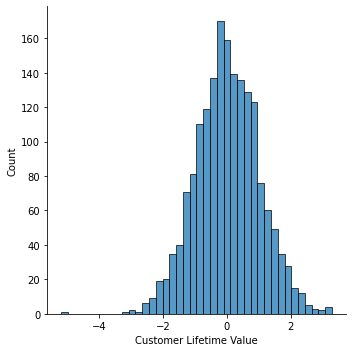

In [43]:
## of Customer Lifetime Value X_test applying Quantile Transformer
X_test['Customer Lifetime Value'] = qt.transform(X_test['Customer Lifetime Value'].to_numpy().reshape(-1,1))
sns.displot(X_test['Customer Lifetime Value'])

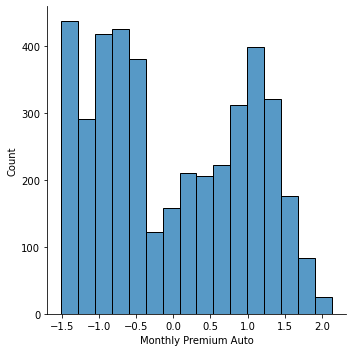

In [44]:
#of Monthly Premium Auto X_train with Yeo-Johnson
yj = PowerTransformer(method="yeo-johnson")
yj.fit_transform(X_train['Monthly Premium Auto'].to_numpy().reshape(-1,1))
X_train['Monthly Premium Auto']= yj.fit_transform(X_train['Monthly Premium Auto'].to_numpy().reshape(-1,1))
sns.displot(X_train['Monthly Premium Auto'])


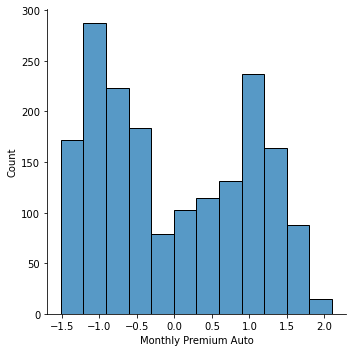

In [45]:
#of Monthly Premium Auto X_test with Yeo-Johnson
yj.fit_transform(X_test['Monthly Premium Auto'].to_numpy().reshape(-1,1))
X_test['Monthly Premium Auto']= yj.fit_transform(X_test['Monthly Premium Auto'].to_numpy().reshape(-1,1))
sns.displot(X_test['Monthly Premium Auto'])

### Applying  linear regresion 

In [46]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(Y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     334.9
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:01:23   Log-Likelihood:                -24906.
No. Observations:                4193   AIC:                         4.991e+04
Df Residuals:                    4146   BIC:                         5.020e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        349.7701      1.428    244.997      0.0

In [47]:
#display adjusted R-squared
print(model.rsquared_adj)

0.7856152290415799


### Model Validation

In [48]:
# Model fitting
model = LinearRegression()  
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [49]:
##Making predictions
Y_pred = model.predict(X_test_scaled)

In [50]:
Y_test

5775    297.600000
1760    182.964184
2947    460.800000
336     574.024018
1950    312.000000
           ...    
1464    501.134524
4269    277.201278
1784    922.335972
614     171.746945
1522    537.600000
Name: Total Claim Amount, Length: 1797, dtype: float64

In [51]:
Y_pred

array([386.74848619, 243.74416388, 402.22548192, ..., 483.0347972 ,
       226.42051079, 574.96693548])

In [52]:
result=pd.DataFrame({"Y_test":Y_test,"Y_pred":Y_pred})

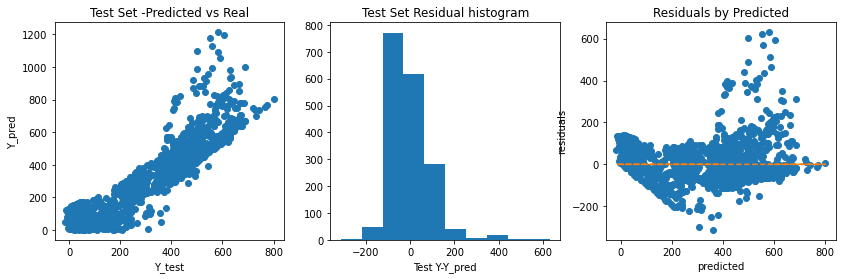

In [53]:
# Make an scatter plot y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(Y_pred, Y_test, 'o')
ax[0].set_xlabel("Y_test")
ax[0].set_ylabel("Y_pred")
ax[0].set_title("Test Set -Predicted vs Real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity

ax[1].hist(Y_test - Y_pred)
ax[1].set_xlabel("Test Y-Y_pred")
ax[1].set_title("Test Set Residual histogram")
# It fairly resembles a normal distribution but it is still skewed 
ax[2].plot(Y_pred,Y_test - Y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(Y_pred,np.zeros(len(Y_pred)),linestyle='dashed')


<AxesSubplot:xlabel='Y_pred', ylabel='Y_test'>

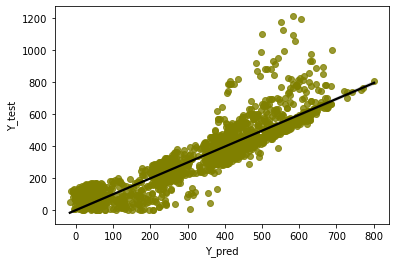

In [54]:
## other visualisation option using seaborn
sns.regplot(x='Y_pred',y='Y_test', data=result, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

### Error metrics

In [55]:
print(mse(Y_test,Y_pred))
print(mae(Y_test,Y_pred))

8713.908618673113
67.3013766454944


In [56]:
R2=r2_score(Y_test,Y_pred)
R2

0.7780134450712779

In [57]:
X_test.shape[1]

48

In [58]:
Adj_R2= 1 - (1-R2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
Adj_R2

0.771917704432503

### Feature Importance

In [59]:
# Due to the dummies the categorical features' importance is hard(impossible) to really extract useful information. 
# 

In [60]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [61]:
features_importances

,Attribute,Importance
32,Policy_Personal L3,6.818956e+14
26,Policy Type_Personal Auto,6.174866e+14
31,Policy_Personal L2,5.907248e+14
27,Policy Type_Special Auto,5.785138e+14
30,Policy_Personal L1,4.793433e+14
...,...,...
16,Education_High School or Below,3.190541e-01
40,Sales Channel_Call Center,2.495876e-01
9,State_Oregon,2.476034e-01
47,month_2,1.389995e-01


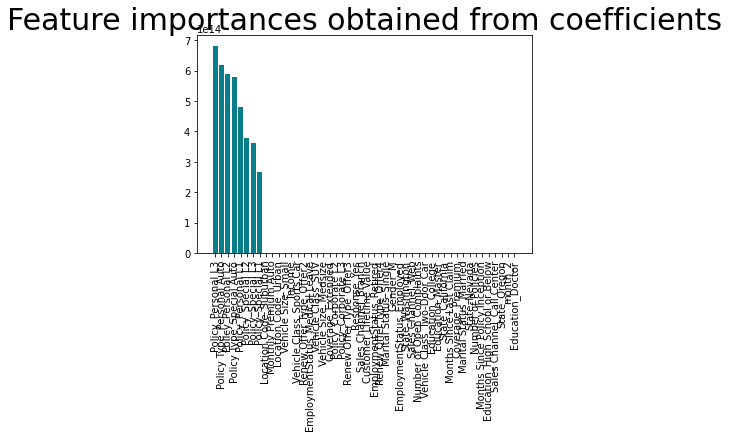

In [62]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=30)
plt.xticks(rotation='vertical')
plt.show()